In [6]:
!pip install scipy

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns',None)

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import re
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

import os
import glob
wdpath = os.getcwd()
wdpath

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'/content'

In [10]:
test_data = pd.read_excel('/content/Data_Test.xlsx')
test_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [12]:
train_data = pd.read_excel('/content/Data_Train.xlsx')
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [14]:
print(train_data.shape)
print(test_data.shape)

(6237, 9)
(1560, 8)


In [15]:
train_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [16]:
test_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

In [17]:
train_data.Price.describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

In [18]:
train_data['Edition_Type'] = train_data['Edition'].apply(lambda x: x.split(',– ')[0])
train_data['Edition_Type'] = train_data['Edition_Type'].apply(lambda x: re.split(',| ',x)[-1])

# train_data['Edition_Type'] = train_data['Edition_Type'].apply(lambda x: x.split(',')[-1])
# train_data['Edition_Type'] = train_data['Edition_Type'].apply(lambda x: x.split(' ')[-1])

train_data['Rating'] = train_data['Reviews'].apply(lambda x: x.split(' ')[0])
train_data['No_of_Reviews'] = train_data['Ratings'].apply(lambda x: x.split(' ')[0])
train_data['Genre'] = train_data['Genre'].apply(lambda x: x.replace('(Books)', ''))
train_data['Year'] = train_data['Edition'].apply(lambda x: x.split(' ')[-1] if x.split()[-1].isdigit() else '2018')

In [19]:
test_data['Edition_Type'] = test_data['Edition'].apply(lambda x: x.split(',– ')[0])
test_data['Edition_Type'] = test_data['Edition_Type'].apply(lambda x: re.split(',| ',x)[-1])

# train_data['Edition_Type'] = train_data['Edition_Type'].apply(lambda x: x.split(',')[-1])
# train_data['Edition_Type'] = train_data['Edition_Type'].apply(lambda x: x.split(' ')[-1])

test_data['Rating'] = test_data['Reviews'].apply(lambda x: x.split(' ')[0])
test_data['No_of_Reviews'] = test_data['Ratings'].apply(lambda x: x.split(' ')[0])
test_data['Genre'] = test_data['Genre'].apply(lambda x: x.replace('(Books)', ''))
test_data['Year'] = test_data['Edition'].apply(lambda x: x.split(' ')[-1] if x.split()[-1].isdigit() else '2018')

In [20]:
# Merging categories with small frequencies
threshold_percent = 1

series = pd.value_counts(train_data['Edition_Type'])
mask = (series / series.sum() * 100).lt(threshold_percent)
train_data = train_data.assign(Edition_Type_updated = np.where(train_data['Edition_Type'].isin(series[mask].index),'Other', train_data['Edition_Type']))

In [21]:
# Merging categories with small frequencies
threshold_percent = 1

series = pd.value_counts(test_data['Edition_Type'])
mask = (series / series.sum() * 100).lt(threshold_percent)
test_data = test_data.assign(Edition_Type_updated = np.where(test_data['Edition_Type'].isin(series[mask].index),'Other', test_data['Edition_Type']))

In [22]:
train_data['Edition_Type_updated'].value_counts()

Paperback    5353
Hardcover     823
Other          61
Name: Edition_Type_updated, dtype: int64

In [23]:
test_data['Edition_Type_updated'].value_counts()

Paperback    1311
Hardcover     233
Other          16
Name: Edition_Type_updated, dtype: int64

In [24]:
for col in train_data.select_dtypes(include='object'):
  train_data[col] = train_data[col].str.lower()

In [25]:
for col in test_data.select_dtypes(include='object'):
  test_data[col] = test_data[col].str.lower()

In [26]:
train_data['No_of_Reviews'] = train_data['No_of_Reviews'].apply(lambda x: x.replace(',', ''))
train_data.No_of_Reviews = train_data.No_of_Reviews.astype('int32')

In [27]:
test_data['No_of_Reviews'] = test_data['No_of_Reviews'].apply(lambda x: x.replace(',', ''))
test_data.No_of_Reviews = test_data.No_of_Reviews.astype('int32')

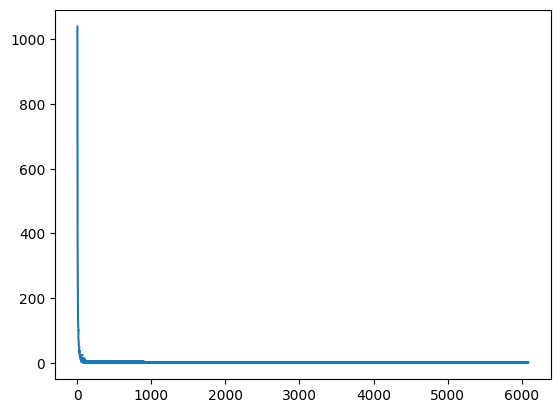

In [28]:
train_data.No_of_Reviews.value_counts().plot()
plt.show()

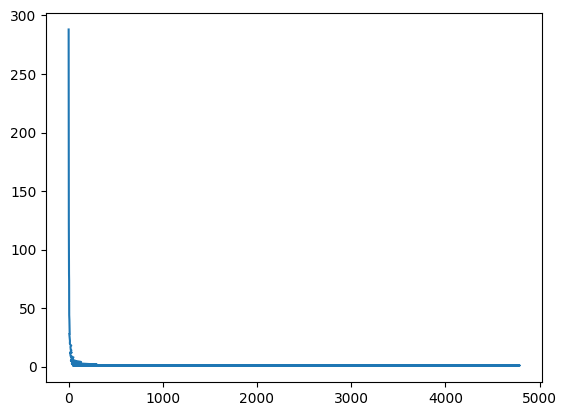

In [29]:
test_data.No_of_Reviews.value_counts().plot()
plt.show()

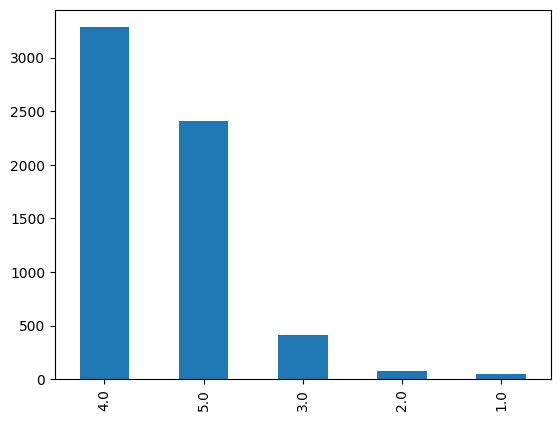

In [30]:
train_data.Rating = round(train_data.Rating.astype('float64'))
train_data.Rating.value_counts().plot(kind = 'bar')
plt.show()

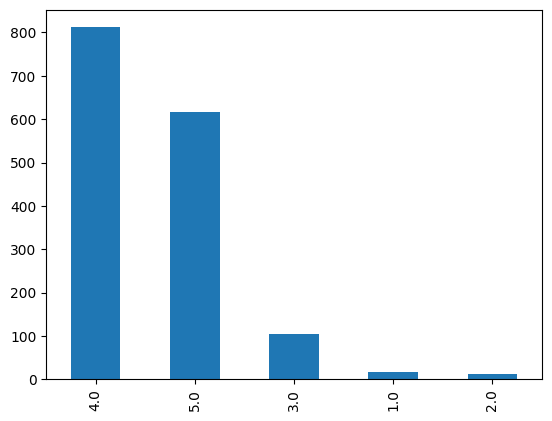

In [31]:
test_data.Rating = round(test_data.Rating.astype('float64'))
test_data.Rating.value_counts().plot(kind = 'bar')
plt.show()

In [32]:
train_data.Synopsis[4]

'for seven decades, "life" has been thrilling the world with its unrivalled presentation of the very best photography to be found. here, the editors have assembled the creme de la creme from the magazine\'s vast collection of images. because "life" has always dealt with matters of every sort, the entire spectrum of society is represented in these pages. one after another, there are unforgettable photos from hollywood\'s greatest stars, from the wonders of small-town america, from the terrible wars, as well as from the zestful years of childhood. "life" has always represented the apex in photojournalism and its roster of great photographers is unequalled.'

In [33]:
test_data.Synopsis[4]

'learn and practise the verbs, prepositions and idioms you need to speak and write naturally in english.'

In [34]:
train_data.Synopsis = train_data.Synopsis.apply(lambda x: " ".join(x.lower() for x in x.split()))
train_data.Synopsis = train_data.Synopsis.apply(lambda x: ' '.join(x for x in x.split() if x.isalnum()))

stop = stopwords.words('english')
train_data.Synopsis = train_data.Synopsis.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

st = PorterStemmer()
train_data.Synopsis = train_data.Synopsis.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

train_data['Sentiment'] = train_data.Synopsis.apply(lambda tweet: TextBlob(tweet).sentiment)

sentiment_series = train_data['Sentiment'].tolist()
columns = ['polarity', 'subjectivity']

df = pd.DataFrame(sentiment_series, columns=columns, index=train_data.index)

train_data['polarity'] = df['polarity']
train_data['subjectivity'] = df['subjectivity']

In [35]:
test_data.Synopsis = test_data.Synopsis.apply(lambda x: " ".join(x.lower() for x in x.split()))
test_data.Synopsis = test_data.Synopsis.apply(lambda x: ' '.join(x for x in x.split() if x.isalnum()))

stop = stopwords.words('english')
test_data.Synopsis = test_data.Synopsis.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

st = PorterStemmer()
test_data.Synopsis = test_data.Synopsis.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

test_data['Sentiment'] = test_data.Synopsis.apply(lambda tweet: TextBlob(tweet).sentiment)

sentiment_series = test_data['Sentiment'].tolist()
columns = ['polarity', 'subjectivity']

df = pd.DataFrame(sentiment_series, columns=columns, index=test_data.index)

test_data['polarity'] = df['polarity']
test_data['subjectivity'] = df['subjectivity']

In [36]:
train_data.Synopsis[4]

'seven thrill world unrival present best photographi editor assembl creme de la creme vast collect alway dealt matter everi entir spectrum societi repres one unforgett photo greatest wonder terribl well zest year alway repres apex photojourn roster great photograph'

In [37]:
test_data.Synopsis[4]

'learn practis preposit idiom need speak write natur'

In [38]:
train_data.drop(['Edition_Type','Synopsis','Title', 'Sentiment','Edition','Reviews','Ratings'], axis = 1, inplace = True)

In [39]:
test_data.drop(['Edition_Type','Synopsis','Title', 'Sentiment','Edition','Reviews','Ratings'], axis = 1, inplace = True)

In [40]:
cat_cols = train_data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = train_data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

['Author', 'Genre', 'BookCategory', 'Year', 'Edition_Type_updated']
['Price', 'Rating', 'polarity', 'subjectivity']


In [41]:
cat_cols_test = test_data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols_test)

num_cols_test = test_data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols_test)

['Author', 'Genre', 'BookCategory', 'Year', 'Edition_Type_updated']
['Rating', 'polarity', 'subjectivity']


In [42]:
train_data.head()

,Author,Genre,BookCategory,Price,Rating,No_of_Reviews,Year,Edition_Type_updated,polarity,subjectivity
0,chris kuzneski,action & adventure,action & adventure,220.00,4.0,8,2016,paperback,0.281818,0.494949
1,arun khopkar,cinema & broadcast,"biographies, diaries & true accounts",202.93,4.0,14,2012,paperback,0.096853,0.391375
2,thomas hobbes,international relations,humour,299.00,5.0,6,1982,paperback,0.082150,0.346117
3,agatha christie,contemporary fiction,"crime, thriller & mystery",180.00,4.0,13,2017,paperback,0.000000,0.250000
4,editors of life,photography textbooks,"arts, film & photography",965.62,5.0,1,2006,hardcover,0.560000,0.610000


In [43]:
test_data.head()

,Author,Genre,BookCategory,Rating,No_of_Reviews,Year,Edition_Type_updated,polarity,subjectivity
0,sir arthur conan doyle,short stories,"crime, thriller & mystery",4.0,960,1986,paperback,0.057051,0.342949
1,gabriel n. schenker,operating systems textbooks,"computing, internet & digital media",5.0,1,2018,paperback,-0.031818,0.412563
2,danielle steel,romance,romance,5.0,4,2011,paperback,0.210534,0.566595
3,allen b. downey,programming & software development,"computing, internet & digital media",4.0,11,2016,paperback,0.176667,0.408056
4,redman gairns,linguistics,"language, linguistics & writing",4.0,9,2011,paperback,0.000000,0.000000


In [44]:
train_data['Author']=train_data.Author.astype("category").cat.codes
train_data['BookCategory']=train_data.BookCategory.astype("category").cat.codes
train_data['Edition_Type_updated']=train_data.Edition_Type_updated.astype("category").cat.codes
train_data['Year']=train_data.Year.astype("category").cat.codes
train_data['Genre']=train_data.Genre.astype("category").cat.codes

In [45]:
test_data['Author']=test_data.Author.astype("category").cat.codes
test_data['BookCategory']=test_data.BookCategory.astype("category").cat.codes
test_data['Edition_Type_updated']=test_data.Edition_Type_updated.astype("category").cat.codes
test_data['Year']=test_data.Year.astype("category").cat.codes
test_data['Genre']=test_data.Genre.astype("category").cat.codes

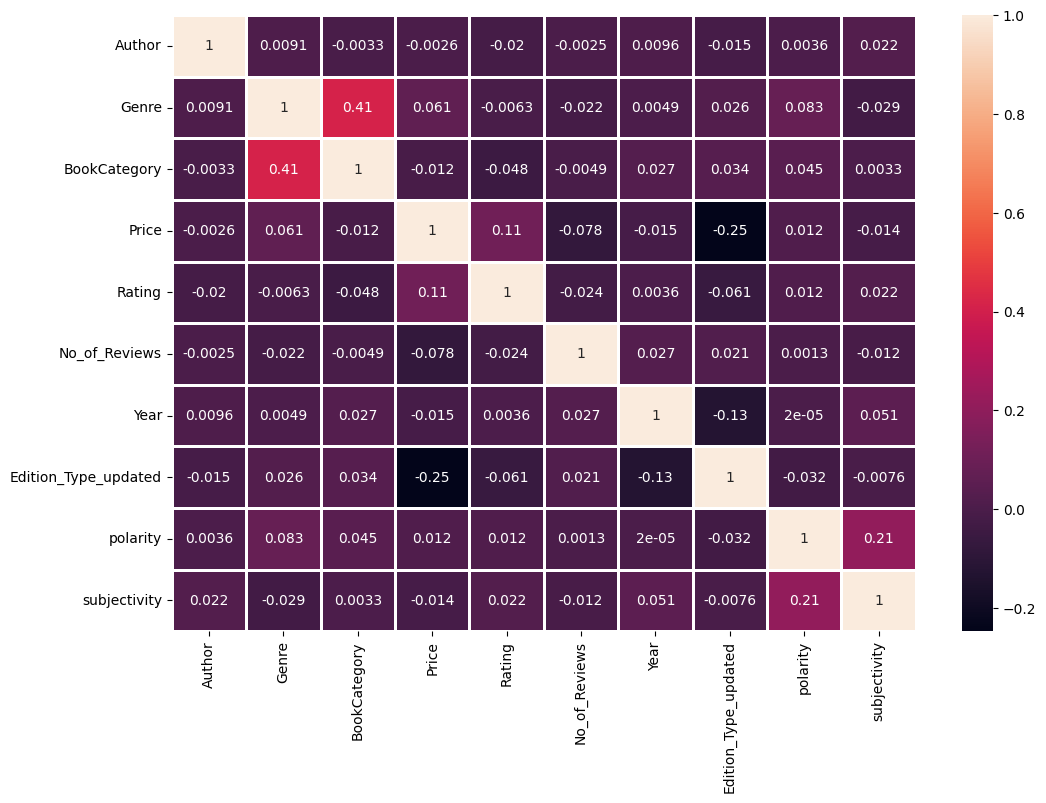

In [46]:
plt.rcParams['figure.figsize'] = 12, 8
sns.heatmap(train_data.corr(),annot=True, linewidths=1)
plt.show()

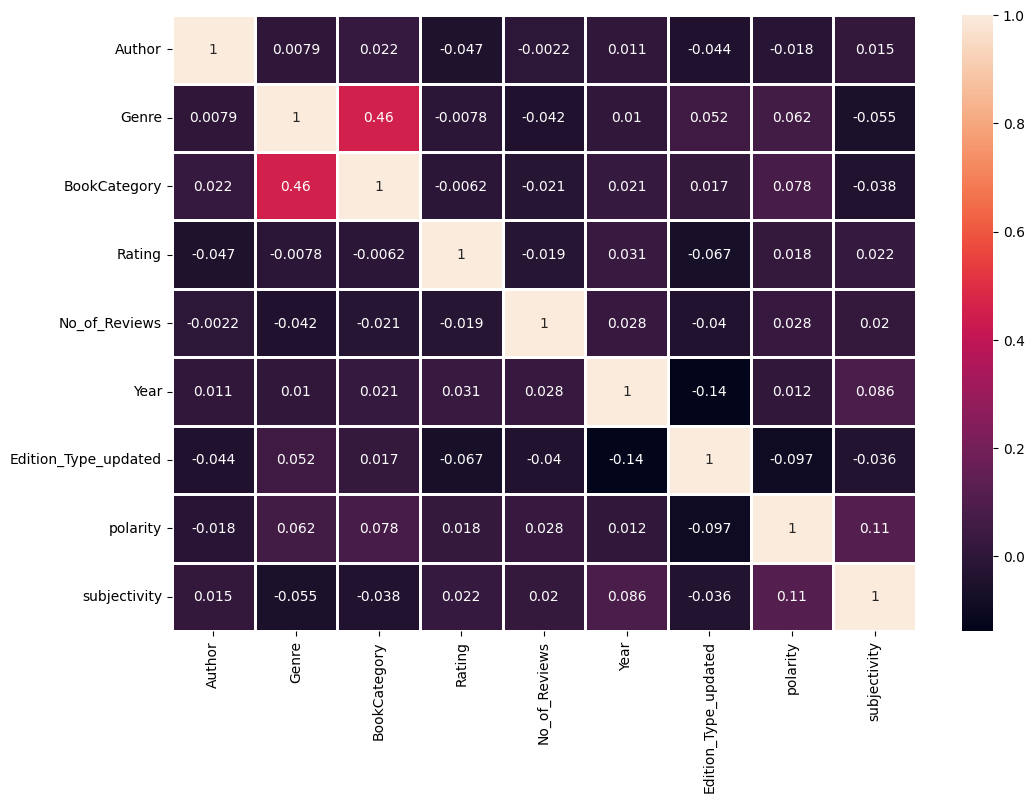

In [47]:
plt.rcParams['figure.figsize'] = 12, 8
sns.heatmap(test_data.corr(),annot=True, linewidths=1)
plt.show()

In [53]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
X = train_data.drop('Price', axis =1)
y, param = boxcox(train_data.Price)

print('Optimal lambda', param)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

Optimal lambda -0.13820326756118104


In [54]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [50]:

y_pred = regressor.predict(X_val)
mse(y_val, y_pred)

0.07551521374179843

In [56]:
y_pred_test = regressor.predict(test_data)
y_pred_test = inv_boxcox(y_pred_test, param)
y_pred_test

array([239.61401988, 654.39387116, 438.89204056, ..., 415.54311941,
       433.87212262, 440.86950773])

In [57]:
y_pred_test = pd.DataFrame(y_pred_test,columns=['Price'])
pd.DataFrame(y_pred_test,columns=['Price']).to_csv('submission.csv',index=None)